## Crypto Arbitrage

Sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase, and apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

###  Import the required libraries and dependencies.

In [363]:
# Initial imports
import pandas as pd
from pathlib import Path

# Display plotting inline
%matplotlib inline

## Collect the Data

In [364]:
# Read bitstamp.csv and create a dataframe 
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [365]:
# Use .head() on bitstamp to ensure proper import
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [366]:
# Read coinbase.csv and create a dataframe 
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [367]:
# Use .head() on coinbase to ensure proper import
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

### Bitstamp

In [368]:
# Drop all missing values from bitstamp
bitstamp = bitstamp.dropna()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [369]:
# Remove all dollar signs from the Close column
bitstamp = bitstamp["Close"].str.replace("$","", regex=True)
bitstamp

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00     13620.0
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: object

In [370]:
# Convert the data type on the Close column to float
bitstamp['Close'] = bitstamp.astype("float")
bitstamp

Timestamp
2018-01-01 00:00:00                                             13646.48
2018-01-01 00:01:00                                             13658.75
2018-01-01 00:02:00                                             13610.22
2018-01-01 00:03:00                                             13639.09
2018-01-01 00:04:00                                              13620.0
                                             ...                        
2018-03-31 23:56:00                                              6920.32
2018-03-31 23:57:00                                              6934.72
2018-03-31 23:58:00                                              6927.65
2018-03-31 23:59:00                                              6928.01
Close                  Timestamp
2018-01-01 00:00:00    13646.48
2018...
Name: Close, Length: 129068, dtype: object

In [371]:
# Check bitstamp for duplicated values
bitstamp.duplicated().sum()

31341

### Coinbase

In [372]:
# Drop all missing values from coinbase
coinbase = coinbase.dropna()
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [373]:
# Remove all dollar signs from the Close column
coinbase = coinbase["Close"].str.replace("$","", regex=True)
coinbase

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00     13580.0
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
                         ...   
2018-03-31 23:55:00      6930.0
2018-03-31 23:56:00     6930.01
2018-03-31 23:57:00     6933.91
2018-03-31 23:58:00     6937.31
2018-03-31 23:59:00      6934.0
Name: Close, Length: 129322, dtype: object

In [374]:
# Convert the data type on the Close column to float
coinbase['Close'] = coinbase.astype("float")
coinbase

Timestamp
2018-01-01 00:00:00                                             13608.49
2018-01-01 00:01:00                                             13601.66
2018-01-01 00:02:00                                              13580.0
2018-01-01 00:03:00                                             13550.34
2018-01-01 00:04:00                                             13583.44
                                             ...                        
2018-03-31 23:56:00                                              6930.01
2018-03-31 23:57:00                                              6933.91
2018-03-31 23:58:00                                              6937.31
2018-03-31 23:59:00                                               6934.0
Close                  Timestamp
2018-01-01 00:00:00    13608.49
2018...
Name: Close, Length: 129323, dtype: object

In [375]:
# Check coinbase for duplicated values
coinbase.duplicated().sum()

59194

## Analyze the Data

### Step 1: Choose columns of data on which to focus your analysis.


In [376]:
# Select the timeframe between 2018-01-01 and 2018-02-01 for analysis
bitstamp_sliced = bitstamp["Close"].loc["2018-01-01":"2018-02-01"]

# Use .head() on bitstamp_sliced to ensure proper slice
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [377]:
# Select the timeframe between 2018-01-01 and 2018-02-01 for analysis
coinbase_sliced = coinbase["Close"].loc["2018-01-01":"2018-02-01"]

# Use .head() on coinbase_sliced to ensure proper slice
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

In [378]:
# Generate summary statistics for bitstamp
bitstamp.describe()

count     129068
unique     97727
top       8400.0
freq          87
Name: Close, dtype: object

In [379]:
# Generate summary statistics for coinbase
coinbase.describe()

count      129323
unique      70129
top       11400.0
freq           77
Name: Close, dtype: object

<AxesSubplot:xlabel='Timestamp'>

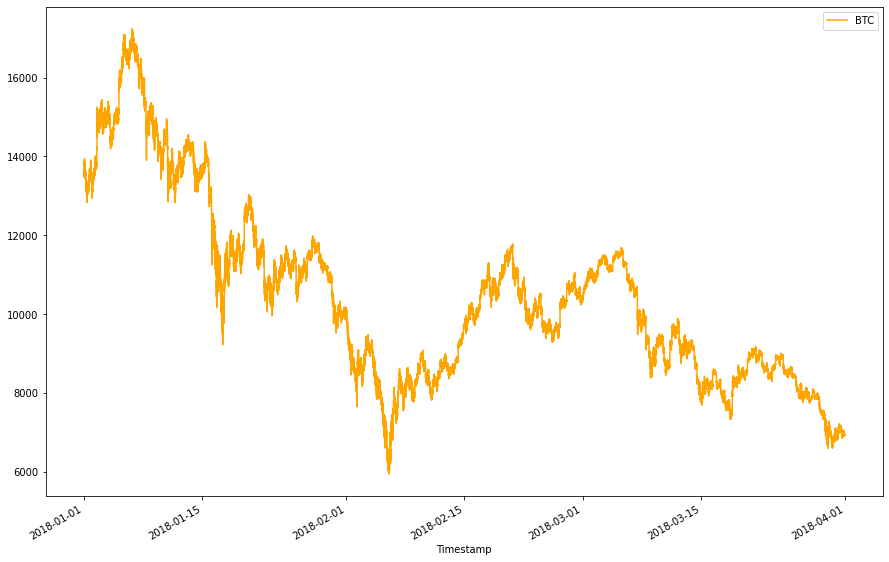

In [380]:
# Created line plot for bitstamp data
bitstamp["Close"].plot(legend=True, figsize=(15, 10), color="orange", label="BTC")

<AxesSubplot:xlabel='Timestamp'>

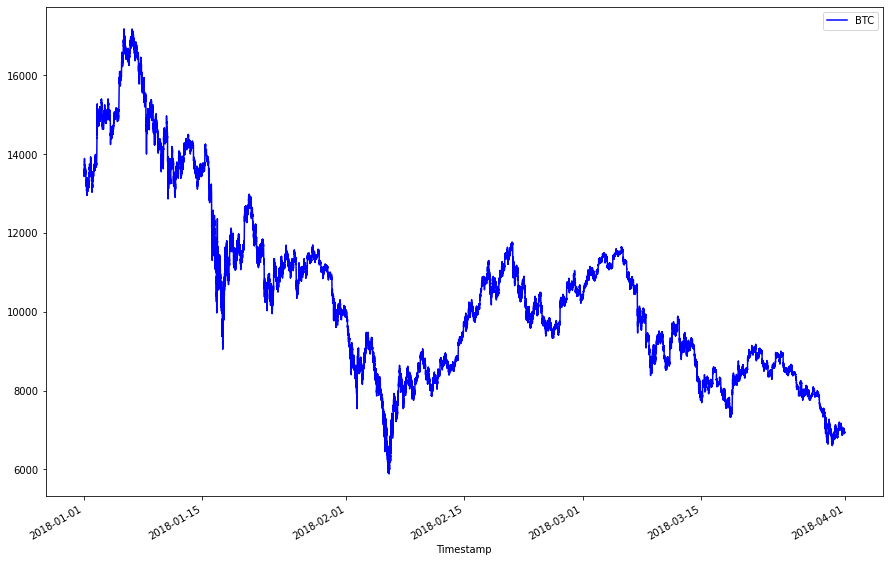

In [381]:
# Created line plot for coinbase data
coinbase["Close"].plot(legend=True, figsize=(15, 10), color="blue", label="BTC")

<AxesSubplot:title={'center':'BTC Bitstamp vs. BTC Coinbase'}, xlabel='Timestamp'>

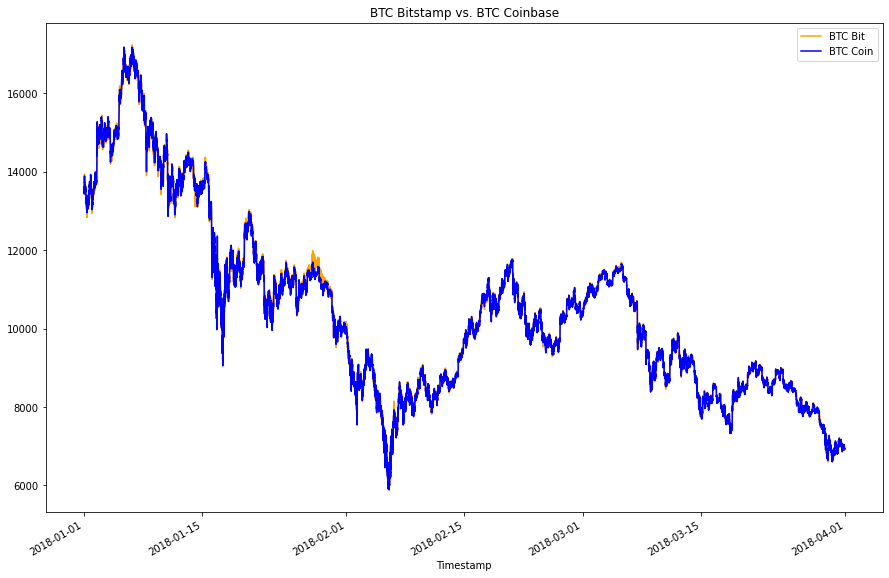

In [382]:
# Created overlay of bitstamp and coinbase data to identify arbitrage opportunity
bitstamp["Close"].plot(legend=True, figsize=(15, 10), title="BTC Bitstamp vs. BTC Coinbase", color="orange", label="BTC Bit")
coinbase["Close"].plot(legend=True, figsize=(15, 10), color="blue", label="BTC Coin")

<AxesSubplot:title={'center':'BTC Bitstamp vs. BTC Coinbase - January'}, xlabel='Timestamp'>

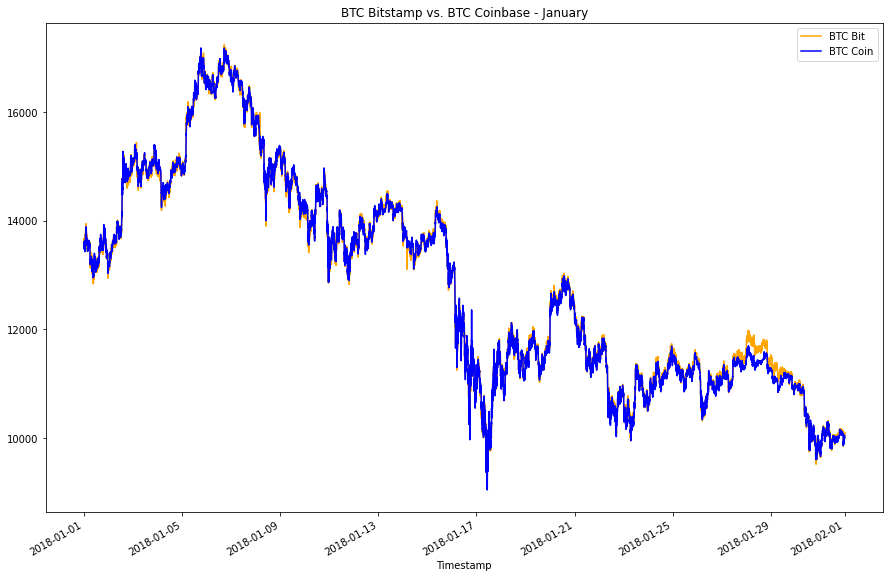

In [383]:
# Created overlay of bitstamp and coinbase data for January of 2018 to identify arbitrage opportunity
bitstamp['Close'].loc["2018-01-01":"2018-01-31"].plot(legend=True, figsize=(15, 10), title="BTC Bitstamp vs. BTC Coinbase - January", color="orange", label="BTC Bit")
coinbase['Close'].loc["2018-01-01":"2018-01-31"].plot(legend=True, figsize=(15, 10), color="blue", label="BTC Coin")

<AxesSubplot:title={'center':'BTC Bitstamp vs. BTC Coinbase - February'}, xlabel='Timestamp'>

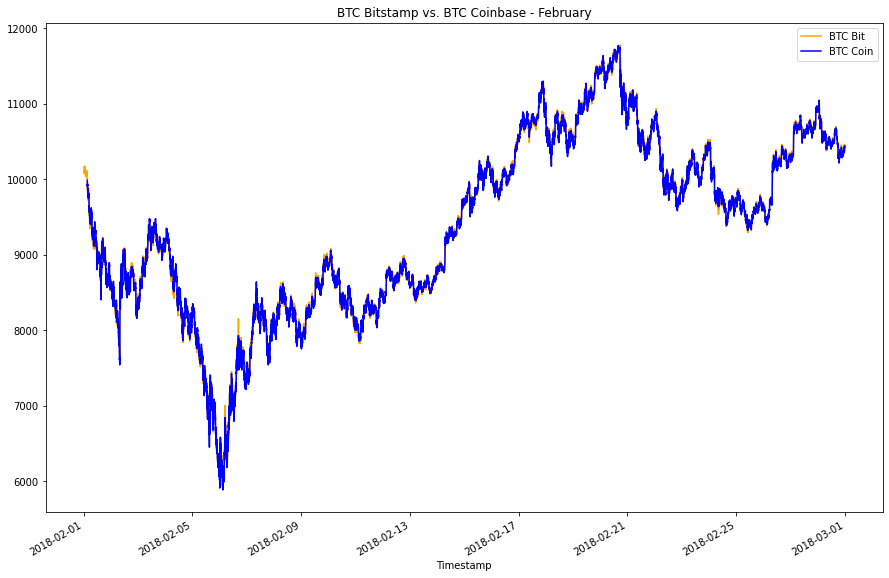

In [384]:
# Created overlay of bitstamp and coinbase data for February of 2018 to identify arbitrage opportunity
bitstamp['Close'].loc["2018-02-01":"2018-02-28"].plot(legend=True, figsize=(15, 10), title="BTC Bitstamp vs. BTC Coinbase - February", color="orange", label="BTC Bit")
coinbase['Close'].loc["2018-02-01":"2018-02-28"].plot(legend=True, figsize=(15, 10), color="blue", label="BTC Coin")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The degree of spread has reduced over time and the two exchanges both follow eachother very closely.

### Step 3: Focus Your Analysis on Specific Dates

<AxesSubplot:title={'center':'BTC Bitstamp vs. BTC Coinbase - Jan 29th'}, xlabel='Timestamp'>

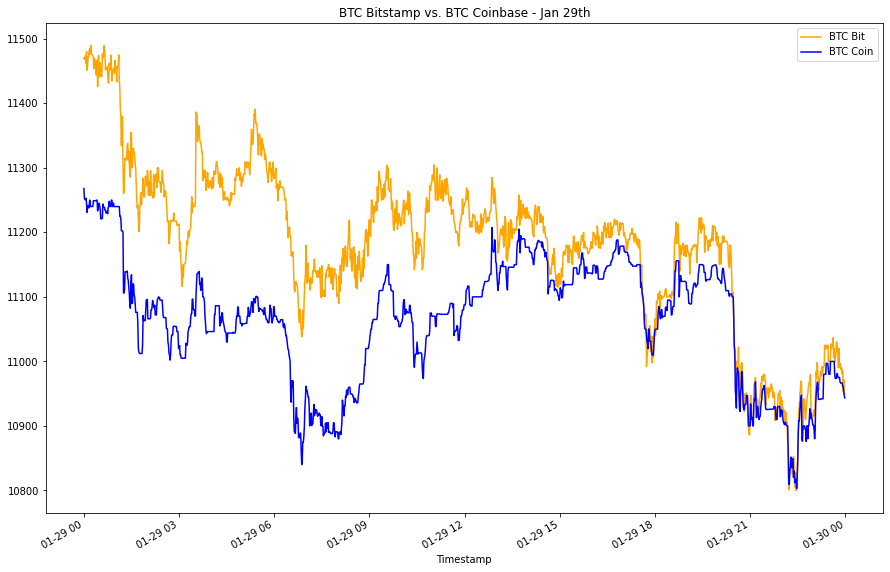

In [385]:
# Created overlay of bitstamp and coinbase data for January 29th of 2018 to identify arbitrage opportunity
bitstamp['Close'].loc["2018-01-29"].plot(legend=True, figsize=(15, 10), title="BTC Bitstamp vs. BTC Coinbase - Jan 29th", color="orange", label="BTC Bit")
coinbase['Close'].loc["2018-01-29"].plot(legend=True, figsize=(15, 10), color="blue", label="BTC Coin")

In [386]:
# Calculate arbitrage spread for January 29th
arbitrage_spread_early = bitstamp["Close"].loc["2018-01-29"] - coinbase["Close"].loc["2018-01-29"]

# Generate summary statistics for January 29th
arbitrage_spread_early.describe()

count    1430.000000
mean      120.214510
std        85.164846
min       -48.010000
25%        37.002500
50%       132.420000
75%       203.237500
max       300.270000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'January 29th Arbitrage Spread'}>

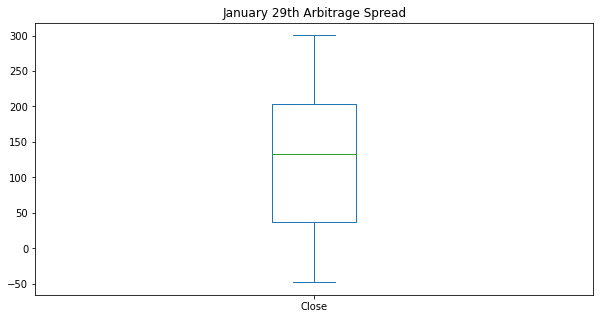

In [387]:
# Visualize the arbitrage spread from January 29th as a box plot
arbitrage_spread_early.plot(legend=True, kind="box", figsize=(10, 5), title="January 29th Arbitrage Spread")

<AxesSubplot:title={'center':'BTC Bitstamp vs. BTC Coinbase - Feb 24th'}, xlabel='Timestamp'>

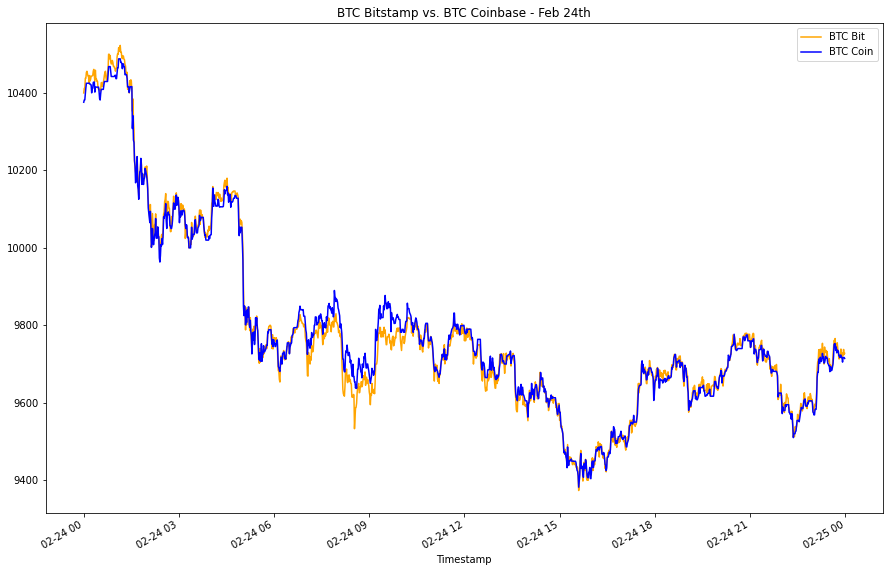

In [388]:
# Created overlay of bitstamp and coinbase data for February 24th of 2018 to identify arbitrage opportunity
bitstamp['Close'].loc["2018-02-24"].plot(legend=True, figsize=(15, 10), title="BTC Bitstamp vs. BTC Coinbase - Feb 24th", color="orange", label="BTC Bit")
coinbase['Close'].loc["2018-02-24"].plot(legend=True, figsize=(15, 10), color="blue", label="BTC Coin")

In [389]:
# Calculate arbitrage spread for February 24th
arbitrage_spread_middle = bitstamp["Close"].loc["2018-02-24"] - coinbase["Close"].loc["2018-02-24"]

# Generate summary statistics for February 24th
arbitrage_spread_middle.describe()

count    1437.000000
mean       -3.396131
std        22.969472
min      -121.320000
25%       -12.120000
50%         0.010000
75%        10.590000
max        50.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'February 24th Arbitrage Spread'}>

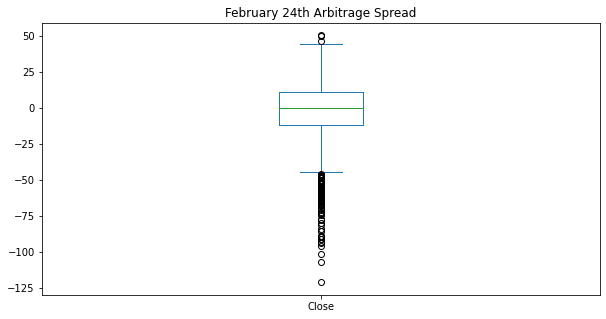

In [390]:
# Visualize the arbitrage spread from February 24th as a box plot
arbitrage_spread_middle.plot(legend=True, kind="box", figsize=(10, 5), title="February 24th Arbitrage Spread")

<AxesSubplot:title={'center':'BTC Bitstamp vs. BTC Coinbase - Mar 26th'}, xlabel='Timestamp'>

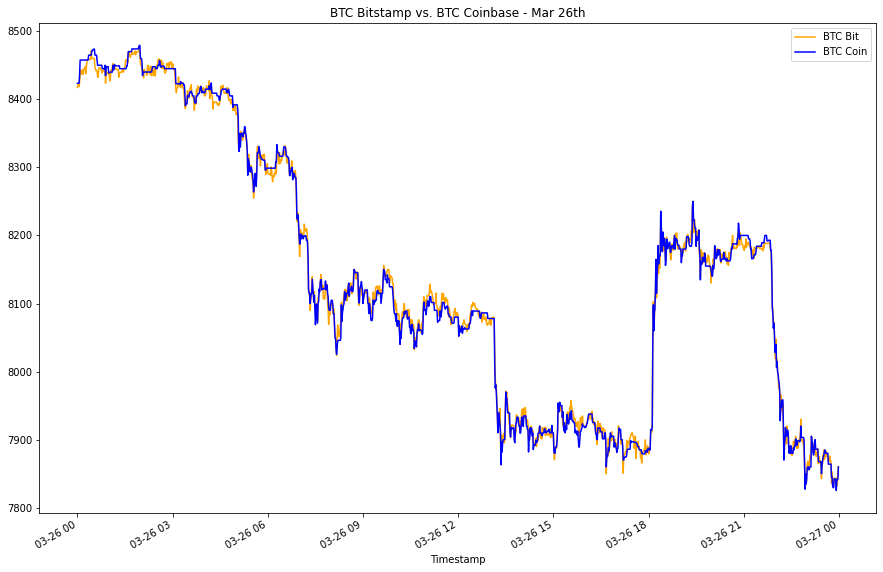

In [391]:
# Created overlay of bitstamp and coinbase data for March 26th of 2018 to identify arbitrage opportunity
bitstamp['Close'].loc["2018-03-26"].plot(legend=True, figsize=(15, 10), title="BTC Bitstamp vs. BTC Coinbase - Mar 26th", color="orange", label="BTC Bit")
coinbase['Close'].loc["2018-03-26"].plot(legend=True, figsize=(15, 10), color="blue", label="BTC Coin")

In [392]:
# Calculate arbitrage spread for March 26th
arbitrage_spread_late = bitstamp["Close"].loc["2018-03-26"] - coinbase["Close"].loc["2018-03-26"]

# Generate summary statistics for March 26th
arbitrage_spread_late.describe()

count    1432.000000
mean        0.722193
std         8.523060
min       -35.070000
25%        -4.965000
50%         0.730000
75%         6.812500
max        32.040000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'March 26th Arbitrage Spread'}>

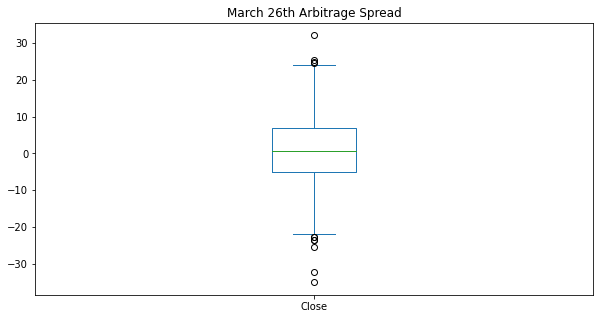

In [393]:
# Visualize the arbitrage spread from March 26th as a box plot
arbitrage_spread_late.plot(legend=True, kind="box", figsize=(10, 5), title="March 26th Arbitrage Spread")

### Step 4: Calculate the Arbitrage Profits

##### January 29th Arbitrage Analysis and Profits

In [394]:
# Calculate arbitrage spread for January 29th
arbitrage_spread_early = bitstamp["Close"].loc["2018-01-29"] - coinbase["Close"].loc["2018-01-29"]

# Generate summary statistics dataframe greater than 0
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    1379.000000
mean      124.976425
std        82.959829
min         0.570000
25%        41.885000
50%       144.380000
75%       204.135000
max       300.270000
Name: Close, dtype: float64

In [395]:
# Calculate the spread return for January 29th
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase["Close"].loc["2018-01-29"]
spread_return_early

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
                         ...   
2018-01-29 23:55:00    0.002155
2018-01-29 23:56:00         NaN
2018-01-29 23:57:00    0.001672
2018-01-29 23:58:00    0.000218
2018-01-29 23:59:00    0.000541
Name: Close, Length: 1440, dtype: float64

In [396]:
# Calculate the profitable trades for January 29th
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Use .head() to verify
profitable_trades_early.head()

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

In [397]:
# Generate summary statistics for profitable trades on January 29th
profitable_trades_early.describe()

count    742.000000
mean       0.017795
std        0.003142
min        0.010021
25%        0.015371
50%        0.018233
75%        0.020063
max        0.027075
Name: Close, dtype: float64

In [398]:
# Calculate the potential profit per trade for January 29th
profit_early = profitable_trades_early * coinbase["Close"].loc["2018-01-29"]

# Drop missing values
profit_per_trade_early = profit_early.dropna()

# View to verify
profit_per_trade_early

Timestamp
2018-01-29 00:00:00    201.98
2018-01-29 00:01:00    217.00
2018-01-29 00:02:00    217.22
2018-01-29 00:03:00    223.22
2018-01-29 00:04:00    208.64
                        ...  
2018-01-29 12:24:00    116.54
2018-01-29 12:31:00    128.44
2018-01-29 12:33:00    121.93
2018-01-29 12:37:00    111.42
2018-01-29 12:39:00    112.75
Name: Close, Length: 742, dtype: float64

In [399]:
# Generate summary statistics for profitable trades on January 29th
profit_per_trade_early.describe()

count    742.000000
mean     196.724070
std       34.604234
min      111.200000
25%      170.037500
50%      200.930000
75%      221.002500
max      300.270000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - January 29th'}, xlabel='Timestamp'>

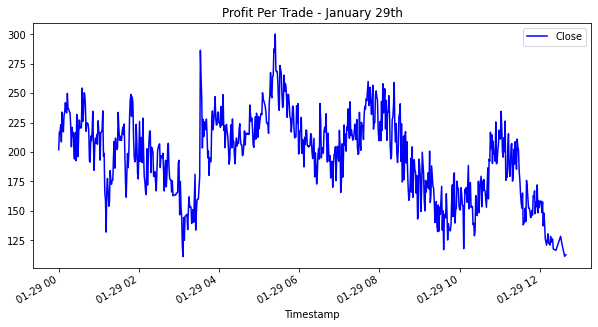

In [425]:
# Generate plot for profitable trades on January 29th
profit_per_trade_early.plot(legend=True, title="Profit Per Trade - January 29th", figsize=(10, 5), color="blue")

In [426]:
# Potential arbitrage profits for January 29th
profit_sum_early = profit_per_trade_early.sum()
print(profit_sum_early)

145969.25999999995


In [427]:
# Cumulative profits over time for January 29th
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits - January 29th'}, xlabel='Timestamp'>

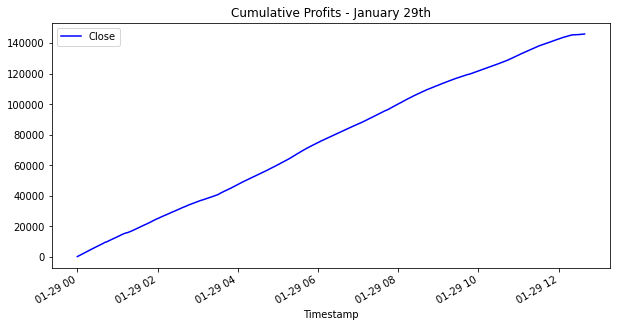

In [428]:
# Plot of cumulative profits over time for January 29th
cumulative_profit_early.plot(legend=True, title="Cumulative Profits - January 29th", figsize=(10, 5), color="blue")

##### February 24th Arbitrage Analysis and Profits

In [429]:
# Calculate arbitrage spread for February 24th
arbitrage_spread_middle = bitstamp["Close"].loc["2018-02-24"] - coinbase["Close"].loc["2018-02-24"]

# Generate summary statistics dataframe greater than 0
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe()

count    719.000000
mean      12.926912
std        9.672629
min        0.010000
25%        5.335000
50%       10.590000
75%       18.245000
max       50.180000
Name: Close, dtype: float64

In [431]:
# Calculate the spread return for February 24th
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / coinbase["Close"].loc["2018-02-24"]
spread_return_middle

Timestamp
2018-02-24 00:00:00    0.002313
2018-02-24 00:01:00    0.002897
2018-02-24 00:02:00    0.002851
2018-02-24 00:03:00    0.003819
2018-02-24 00:04:00    0.002383
                         ...   
2018-02-24 23:55:00    0.001546
2018-02-24 23:56:00    0.000717
2018-02-24 23:57:00    0.002129
2018-02-24 23:58:00    0.000763
2018-02-24 23:59:00    0.001370
Name: Close, Length: 1440, dtype: float64

In [443]:
# Calculate the profitable trades for February 24th
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Use .head() to verify
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [444]:
# Generate summary statistics for profitable trades on February 24th
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [445]:
# Calculate the potential profit per trade for February 24th
profit_middle = profitable_trades_middle * coinbase["Close"].loc["2018-02-24"]

# Drop missing values
profit_per_trade_middle = profit_middle.dropna()

# View to verify
profit_per_trade_middle

Series([], Name: Close, dtype: float64)

In [446]:
# Generate summary statistics for profitable trades on February 24th
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - February 24th'}, xlabel='Timestamp'>

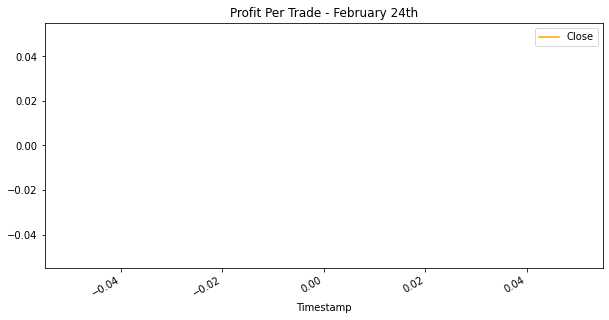

In [447]:
# Generate plot for profitable trades on February 24th
profit_per_trade_middle.plot(legend=True, title="Profit Per Trade - February 24th", figsize=(10, 5), color="orange")

In [448]:
# Potential arbitrage profits for February 24th
profit_sum_middle = profit_per_trade_middle.sum()
print(profit_sum_middle)

0.0


In [449]:
# Cumulative profits over time for February 24th
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits - February 24th'}, xlabel='Timestamp'>

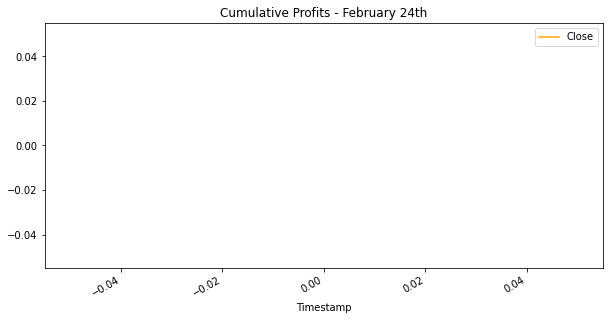

In [450]:
# Plot of cumulative profits over time for February 24th
cumulative_profit_middle.plot(legend=True, title="Cumulative Profits - February 24th", figsize=(10, 5), color="orange")

##### March 26th Arbitrage Analysis and Profits

In [451]:
# Calculate arbitrage spread for March 26th
arbitrage_spread_late = bitstamp["Close"].loc["2018-03-26"] - coinbase["Close"].loc["2018-03-26"]

# Generate summary statistics dataframe greater than 0
arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    772.000000
mean       6.980415
std        5.106336
min        0.010000
25%        2.967500
50%        6.285000
75%        9.915000
max       32.040000
Name: Close, dtype: float64

In [452]:
# Calculate the spread return for March 26th
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase["Close"].loc["2018-03-26"]
spread_return_late

Timestamp
2018-03-26 00:00:00         NaN
2018-03-26 00:01:00         NaN
2018-03-26 00:02:00         NaN
2018-03-26 00:03:00         NaN
2018-03-26 00:04:00         NaN
                         ...   
2018-03-26 23:55:00    0.002286
2018-03-26 23:56:00         NaN
2018-03-26 23:57:00         NaN
2018-03-26 23:58:00    0.001472
2018-03-26 23:59:00    0.000043
Name: Close, Length: 1439, dtype: float64

In [453]:
# Calculate the profitable trades for March 26th
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Use .head() to verify
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

In [454]:
# Generate summary statistics for profitable trades on March 26th
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [418]:
# Calculate the potential profit per trade for March 26th
profit_late = profitable_trades_late * coinbase["Close"].loc["2018-03-26"]

# Drop missing values
profit_per_trade_late = profit_late.dropna()

# View to verify
profit_per_trade_late

Series([], Name: Close, dtype: float64)

In [419]:
# Generate summary statistics for profitable trades on March 26th
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - March 26th'}, xlabel='Timestamp'>

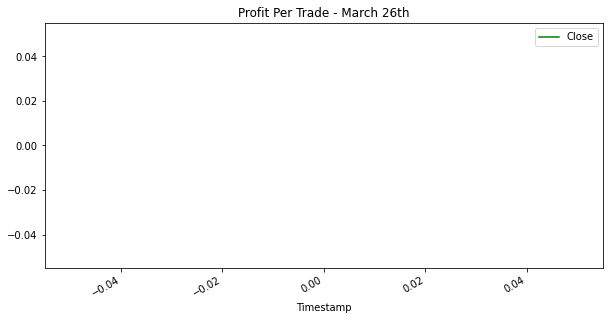

In [420]:
# Generate plot for profitable trades on March 26th
profit_per_trade_late.plot(legend=True, title="Profit Per Trade - March 26th", figsize=(10, 5), color="green")

In [421]:
# Potential arbitrage profits for March 26th
profit_sum_late = profit_per_trade_late.sum()
print(profit_sum_late)

0.0


In [422]:
# Cumulative profits over time for March 26th
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits - March 26th'}, xlabel='Timestamp'>

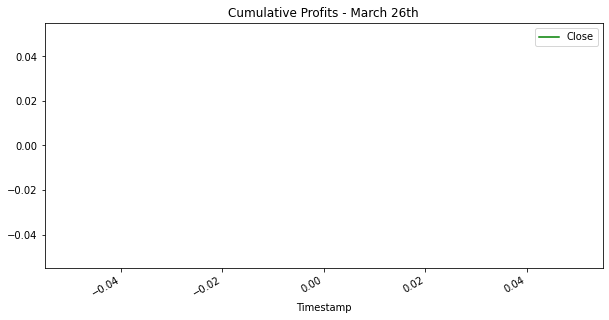

In [423]:
# Plot of cumulative profits over time for March 26th
cumulative_profit_late.plot(legend=True, title="Cumulative Profits - March 26th", figsize=(10, 5), color="green")

### Ye

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Reviewing the profit information across all three dates showed that only one of the dates was actually able to be profitable in any way. The other two dates, despite having clear price differences on the initial plots, werent able to produce any profits above 1%. This shows that arbitrage opportunities are very difficult to come by and many that exist are not great enough to be profitable. 